### Exploratory Data Analysis (EDA)

In [1]:
### load libraries for eda

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
### load dataset

df = pd.read_excel("glass.xlsx",sheet_name="glass")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
### summary

df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
### finding null values

df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
### finding duplicate rows

df.duplicated().sum()

np.int64(1)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
### there is also no 0 values

In [10]:
### check target distribution

df["Type"].value_counts()

Type
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64

### Data Visualization

<Axes: >

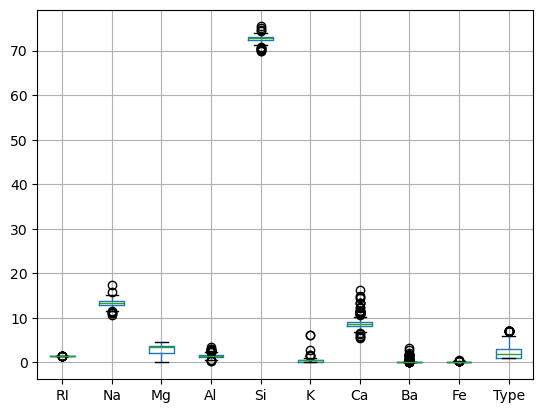

In [11]:
### boxplot

df.boxplot()

In [12]:
### for random forest we no need to remove the outliers strictly

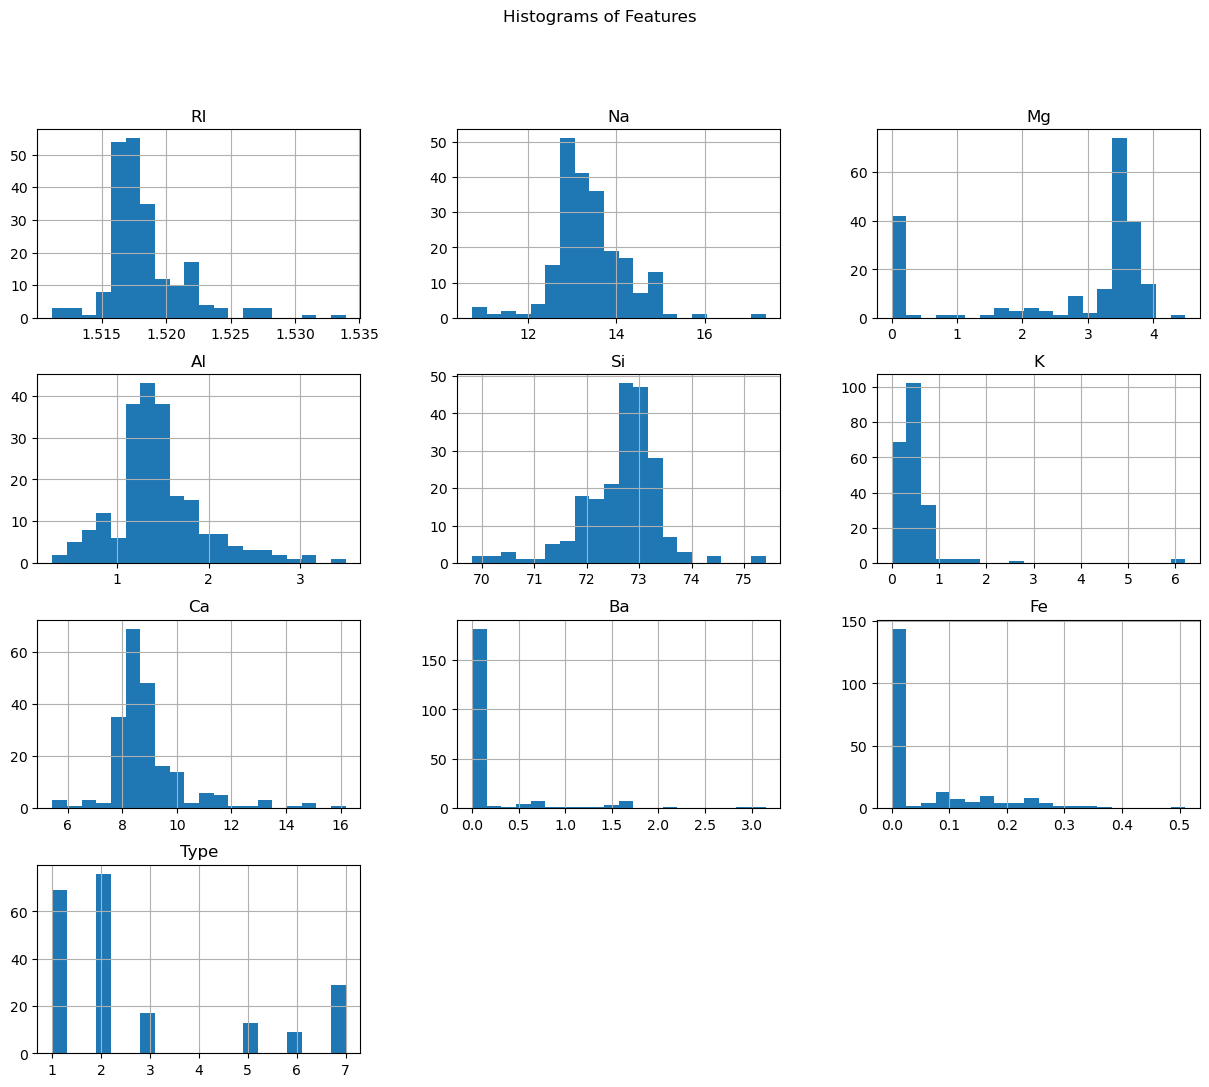

In [13]:
### histogram

df.hist(figsize=(15, 12), bins=20)
plt.suptitle("Histograms of Features")
plt.show()

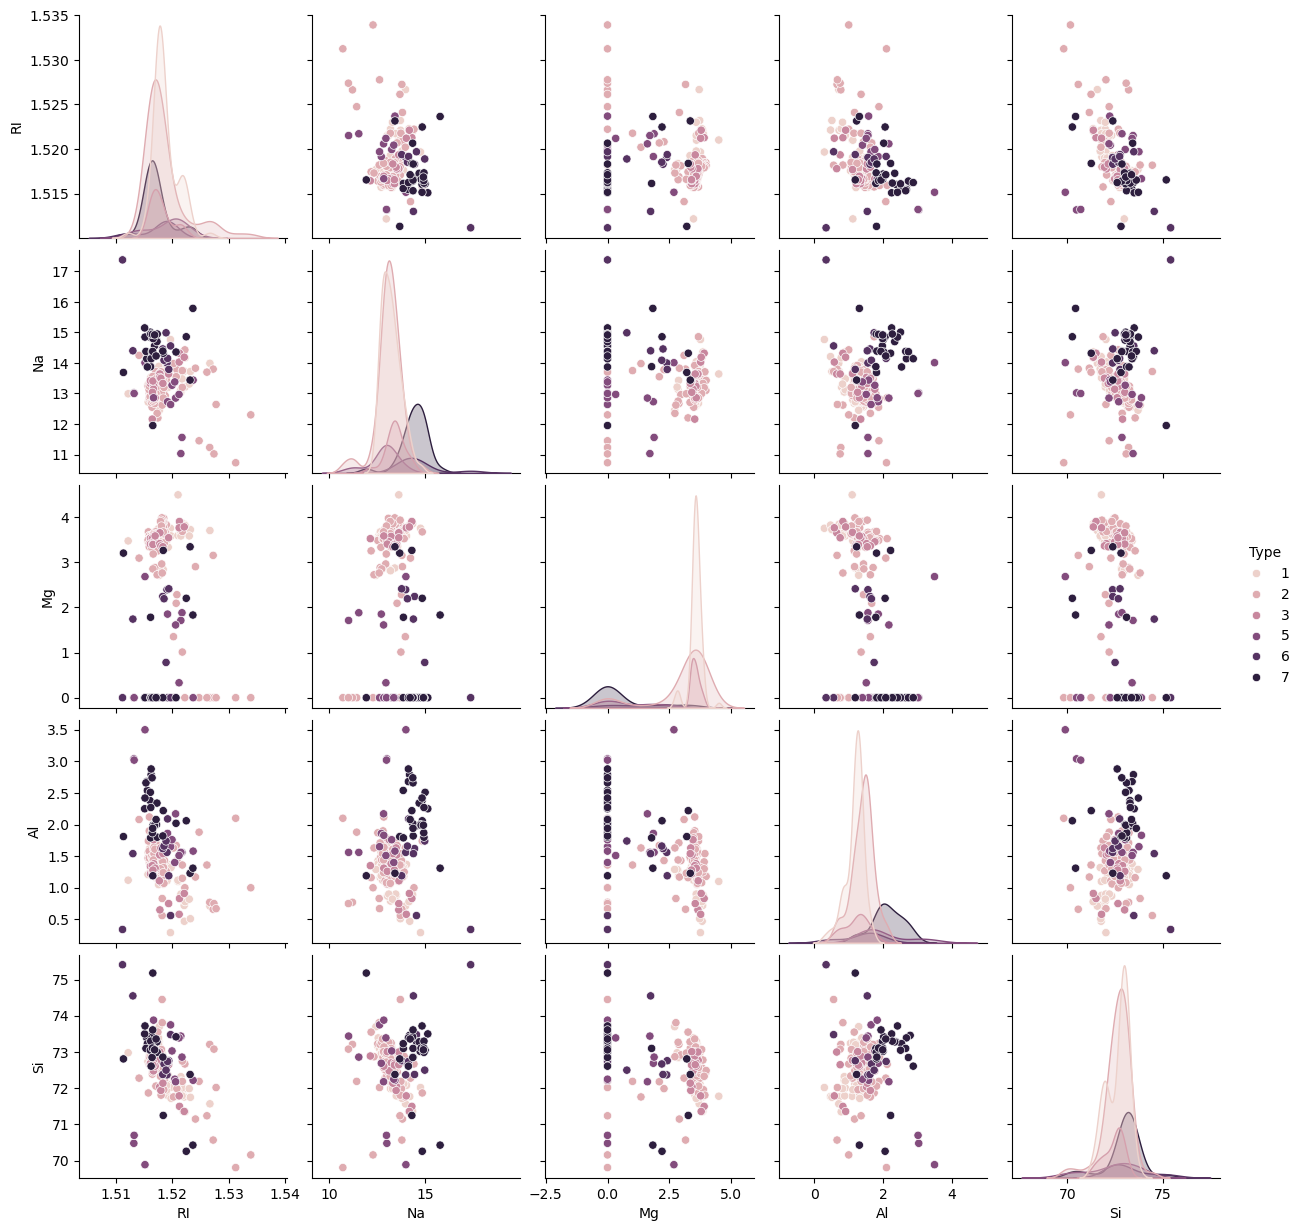

In [14]:
# Pair plot (subset of columns to keep it readable)

sns.pairplot(df, hue='Type', vars=['RI', 'Na', 'Mg', 'Al', 'Si'])
plt.show()

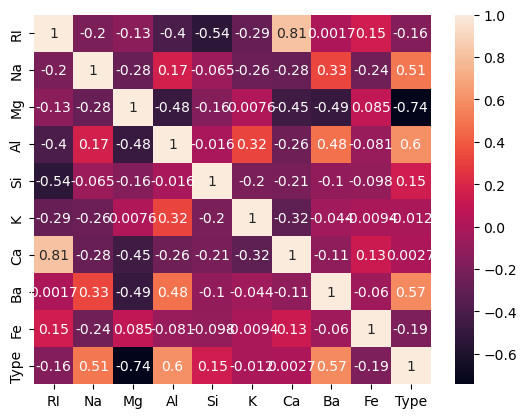

In [15]:
### correlation matrix

corr = df.corr()
sns.heatmap(corr,annot=True)
plt.show()

### Data Preprocessing

In [16]:
### import libraries

from sklearn.preprocessing import StandardScaler

In [17]:
### splitting into feature and target

feature = df.drop(columns="Type")
target = df["Type"]

In [18]:
std_sca = StandardScaler()

In [19]:
feature = std_sca.fit_transform(feature)

In [20]:
feature

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

In [22]:
# Handle Imbalance using SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(feature, target)

In [23]:
print(f"Original shape: {feature.shape}")
print(f"Resampled shape: {X_resampled.shape}")
print("Resampled class distribution:")
print(pd.Series(y_resampled).value_counts())

Original shape: (213, 9)
Resampled shape: (456, 9)
Resampled class distribution:
Type
1    76
2    76
3    76
5    76
6    76
7    76
Name: count, dtype: int64


### Model Implementation

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [26]:
# Train-Test Split (on resampled data)

x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [28]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

In [29]:
y_pred_rf

array([3, 1, 3, 6, 7, 6, 1, 7, 7, 3, 6, 3, 6, 7, 1, 7, 5, 3, 7, 6, 1, 3,
       3, 3, 2, 2, 1, 7, 3, 7, 2, 5, 5, 2, 1, 5, 3, 2, 5, 6, 3, 1, 5, 1,
       1, 7, 7, 6, 1, 2, 5, 2, 2, 6, 1, 7, 6, 6, 1, 5, 6, 3, 6, 1, 7, 3,
       6, 5, 5, 6, 5, 5, 2, 6, 2, 1, 5, 3, 5, 2, 7, 1, 6, 7, 2, 5, 3, 7,
       1, 2, 2, 5])

In [30]:
# Evaluation
print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.9239
Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.87      0.84        15
           2       0.93      0.87      0.90        15
           3       0.93      0.93      0.93        15
           5       0.94      0.94      0.94        16
           6       1.00      1.00      1.00        16
           7       0.93      0.93      0.93        15

    accuracy                           0.92        92
   macro avg       0.92      0.92      0.92        92
weighted avg       0.93      0.92      0.92        92



### Bagging and Boosting Methods

In [31]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [33]:
# Bagging (using Decision Trees)
bag_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bag_model.fit(x_train, y_train)
y_pred_bag = bag_model.predict(x_test)

In [35]:
# Boosting (AdaBoost)
boost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
boost_model.fit(x_train, y_train)
y_pred_boost = boost_model.predict(x_test)

In [36]:
print("\nBagging Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_bag):.4f}")

print("\nBoosting Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_boost):.4f}")


Bagging Results:
Accuracy: 0.8913

Boosting Results:
Accuracy: 0.4565


In [37]:
# Comparison Table
results = pd.DataFrame({
    'Model': ['Random Forest', 'Bagging', 'Boosting'],
    'Accuracy': [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_bag), accuracy_score(y_test, y_pred_boost)],
    'F1 Score (weighted)': [f1_score(y_test, y_pred_rf, average='weighted'), f1_score(y_test, y_pred_bag, average='weighted'), f1_score(y_test, y_pred_boost, average='weighted')]
})
print("\nModel Comparison:")
print(results)


Model Comparison:
           Model  Accuracy  F1 Score (weighted)
0  Random Forest  0.923913             0.924227
1        Bagging  0.891304             0.890367
2       Boosting  0.456522             0.385667


### Additional Notes